<a href="https://colab.research.google.com/github/saahilahujaa/Passenger-Fare-Amount-Prediction/blob/main/Passenger_Fare_Amount_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Passenger Fare Amount Prediction**

## **Objective** 

## **Importing Neccessary Libraries**
Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model. Libraries like Pandas(and numpy), matplotlib(and seaborn) and sklearn are required for data manipulation, visualization and Machine Learning respectively.

In [1]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Datatime library for Date columns.
from datetime import datetime
import datetime as dt
from operator import itemgetter

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Importing from math library
from math import radians, cos, sin, asin, sqrt

# importing XGB regressor.
from xgboost import XGBRegressor

# Import metrics libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing graphviz for visualizing decision trees.
import graphviz
import sklearn.tree as tree

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


## **Data Gathering and Discovery**
Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model. Libraries like Pandas(and numpy), matplotlib(and seaborn) and sklearn are required for data manipulation, visualization and Machine Learning respectively.

In [2]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# The variable Data_path contains the path of dataset stored in drive.
data_path = "/content/drive/MyDrive/Alma Better/Capstone Projects/Passenger Fare Amount Prediction/"

# Importing Cardiovascular risk Data File.
trip_df = pd.read_csv(data_path + "trip.csv")

# Show the dataframe.
trip_df

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


Now lets see the first few rows to the dataset to understand the data and see what all attributes are present in the data file.

In [4]:
# First 5 rows of dataset.
trip_df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
# Shape of the data file (rows, columns).
trip_df.shape

(200000, 9)

The dataset contains the details of various trips when customers booked the taxi to reach their respective destination. It includes 2,00,000 records and 9 attributes.

**Data Description and Attributes:-**

*   index - a unique identifier for each trip.

*   key - timestamp when the meter was engaged.

*   pickup_datetime - date and time when the meter was engaged.

*   passenger_count - the number of passengers in the vehicle (driver entered value).

*   pickup_longitude - the longitude where the meter was engaged.

*   pickup_latitude - the latitude where the meter was engaged.

*   dropoff_longitude - the longitude where the meter was disengaged.

*   dropoff_latitude - the latitude where the meter was disengaged.

**Dependent Variable:-**

*   ***fare_amount - the cost of each trip in USD.***

In [6]:
# Description of all columns in the dataset.
trip_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,200000.0,NaN,NaN,NaN,27712503.68235,16013822.212829,1.0,13825346.25,27745495.0,41555300.75,55423567.0
key,200000,200000,2015-05-07 19:52:06.0000003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,200000.0,NaN,NaN,NaN,11.359955,9.901776,-52.0,6.0,8.5,12.5,499.0
pickup_datetime,200000,196629,2014-04-13 18:19:00 UTC,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,200000.0,NaN,NaN,NaN,-72.527638,11.437787,-1340.64841,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,NaN,NaN,NaN,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,NaN,NaN,NaN,-72.525292,13.117408,-3356.6663,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,NaN,NaN,NaN,39.92389,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,NaN,NaN,NaN,1.684535,1.385997,0.0,1.0,1.0,2.0,208.0


In [7]:
# Brief information about the datatype of attributes and their null counts. 
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


We can see that the data is very clean with just 1 null value in dropoff_longitude and dropoff_latitude.

In [8]:
  # Looking for duplicate data points
  duplicates = trip_df[trip_df.duplicated()]
  duplicates

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


We can see that there are no duplicate records.


## **EDA and Feature Engineering**

Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. It’s a scientific approach to get the story of the data.

It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed. Also we'd deal with outliers in this section. Furthermore, we'll try to extract or convert some of the attributes using some feature engineering.

All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises. Feature engineering mainly have two goals:

* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

*Lets just start by removing all null values from the data.*

In [9]:
# Removing the row(s) having null values
df = trip_df.dropna()
df

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


The index and key don't contribute much as we already have the pickup_datetime and it would'nt be of much help to the model either. Hence, we can drop these columns too.

In [10]:
# Dropping the "id" column.
df = df.drop(columns=['index', 'key'])

Now lets have a look at the remaining columns.

In [11]:
# Print all columns.
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [12]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
df['pickup_datetime'] =  pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [13]:
# We will separate the Pickup_datetime column into separate field like year, month, day of the week, etc

df['year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Date'] = df['pickup_datetime'].dt.day
df['Day'] = df['pickup_datetime'].dt.dayofweek
df['Hour'] = df['pickup_datetime'].dt.hour
df['Minute'] = df['pickup_datetime'].dt.minute

### Passenger Count

In [14]:
# Looking at the number of passengers travellers book a taxi for
df['passenger_count'].value_counts()

1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: passenger_count, dtype: int64

Here we can see that the majority of the taxis which were booked had only a single passenger travelling.

Also a few of the taxis which were booked had 0 passengers. This might be the case when the passenger is using the taxi for delivering something on an urgent basis. We can't just simply assume a lot of data points like this to be wrong.

Also we can see that there were 208 passengers in a single trip which is not possible. So we can remove that as it acts as an anomally for our models and might affect its performance. Even if we consider SUV, there couldn't be more than 6 passengers.

In [36]:
df = df.drop((df[df['passenger_count']>6]).index, axis=0)

In [15]:
# Looking at the target variable 'fare_amount'
df['fare_amount'].describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

As observed, the minimum fare is a negative amount which means we might have data points having negative fare amount. We'll remove such points.

In [16]:
# Dropping rows with value of fare_amount less than or equal to 0
df = df.drop(df[df["fare_amount"] <= 0].index, axis=0)

In [17]:
df.shape

(199977, 13)

Now let's check the pickup latiotude and longitude.

In [18]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# We need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
df[df['pickup_latitude']<-90]
df[df['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
56617,8.1,2012-03-11 07:24:00,-73.960828,404.433332,-73.988357,40.769037,1,2012,3,11,6,7,24
61793,8.5,2012-06-13 05:45:00,-73.951385,401.066667,-73.982110,40.754117,1,2012,6,13,2,5,45
75851,15.7,2011-11-05 00:22:00,-1340.648410,1644.421482,-3356.666300,872.697628,1,2011,11,5,5,0,22
91422,16.1,2011-05-18 13:24:00,57.418457,1292.016128,1153.572603,-881.985513,1,2011,5,18,2,13,24


In [19]:
# Hence dropping values for such cases
df = df.drop((df[df['pickup_latitude']<-90]).index, axis=0)
df = df.drop((df[df['pickup_latitude']>90]).index, axis=0)

In [28]:
# Removing all such cases if there in our dataset
df = df.drop((df[df['pickup_longitude']<-90]).index, axis=0)
df = df.drop((df[df['pickup_longitude']>90]).index, axis=0)
df = df.drop((df[df['dropoff_latitude']<-90]).index, axis=0)
df = df.drop((df[df['dropoff_latitude']>90]).index, axis=0)
df = df.drop((df[df['dropoff_longitude']<-90]).index, axis=0)
df = df.drop((df[df['dropoff_longitude']>90]).index, axis=0)


In [21]:
df.shape

(199973, 13)

***Now we have successfully cleared our dataset. Thus proceeding for further operations:***

### Calculating Distance

*Now the next very important task is to calculate the distance btetween the pickup and the drop locations using the latitudes and longitudes.*

In [22]:
# As we know that we have been given the pickup longitute and latitude values and same for the dropoff. 
# So we need to calculate the distance using the haversine formula and we will create a new variable called distance
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [23]:
# Making a new column distance where we'll apply the haversine function created above.
df['distance'] = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [38]:
df.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,7.5,1,2015,5,7,3,19,1.683323
1,7.7,1,2009,7,17,4,20,2.457590
2,12.9,1,2009,8,24,0,21,5.036377
3,5.3,3,2009,6,26,4,8,1.661683
4,16.0,5,2014,8,28,3,17,4.475450


In [25]:
df['distance'].describe()

count    199973.000000
mean         20.675628
std         380.216775
min           0.000000
25%           1.215364
50%           2.121053
75%           3.875077
max       10321.507661
Name: distance, dtype: float64

We can observe that the minimum distance is 0 so we need to remove such data points.

In [30]:
# Removing the cases where distance is equal to 0
df = df.drop((df[df['distance'] == 0]).index, axis=0)


Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [39]:
df.shape

(194333, 8)

In [ ]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
df = df.drop(drop, axis = 1)

In [33]:
df.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,7.5,1,2015,5,7,3,19,1.683323
1,7.7,1,2009,7,17,4,20,2.457590
2,12.9,1,2009,8,24,0,21,5.036377
3,5.3,3,2009,6,26,4,8,1.661683
4,16.0,5,2014,8,28,3,17,4.475450


### **Data Visualization**

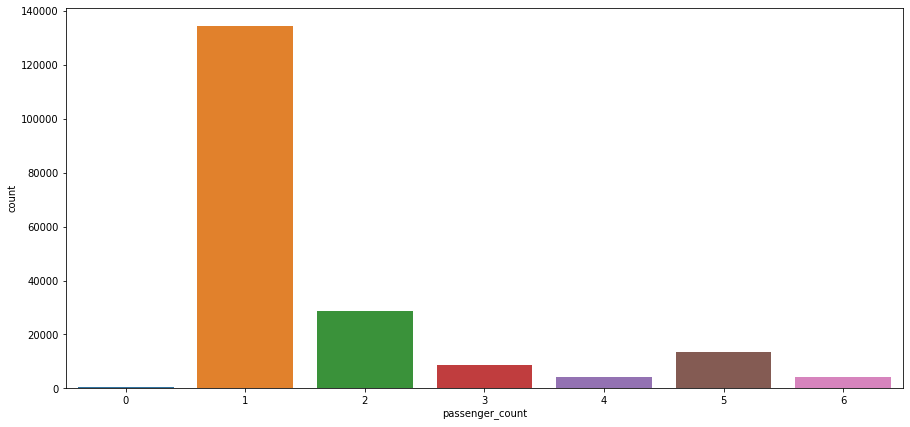

In [41]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x = "passenger_count", data=df)

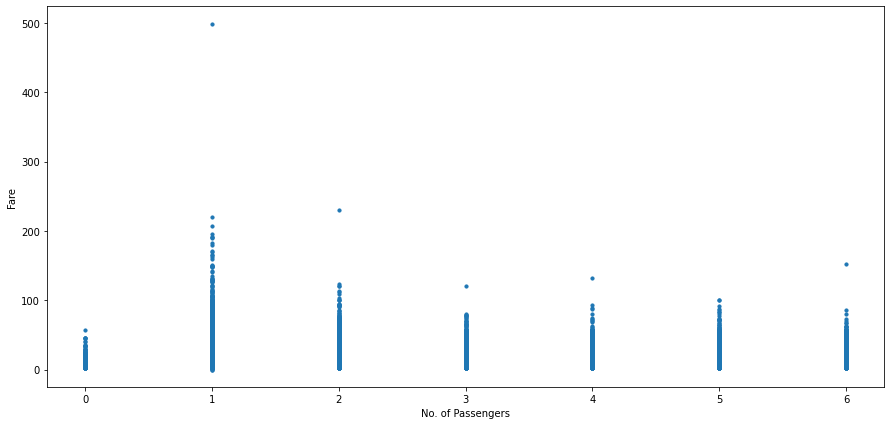

In [42]:
#Relationship beetween number of passengers and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['passenger_count'], y = df['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

***Observations:***

1.   Single travelling passengers are most frequent travellers.
2.   At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.



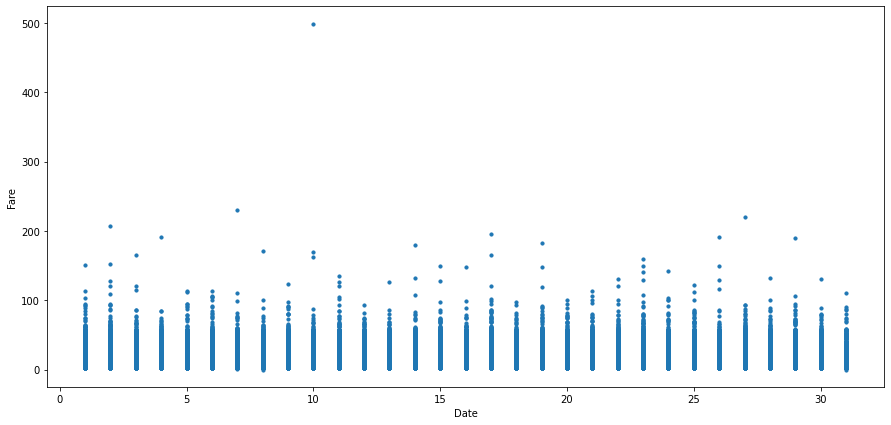

In [43]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['Date'], y = df['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

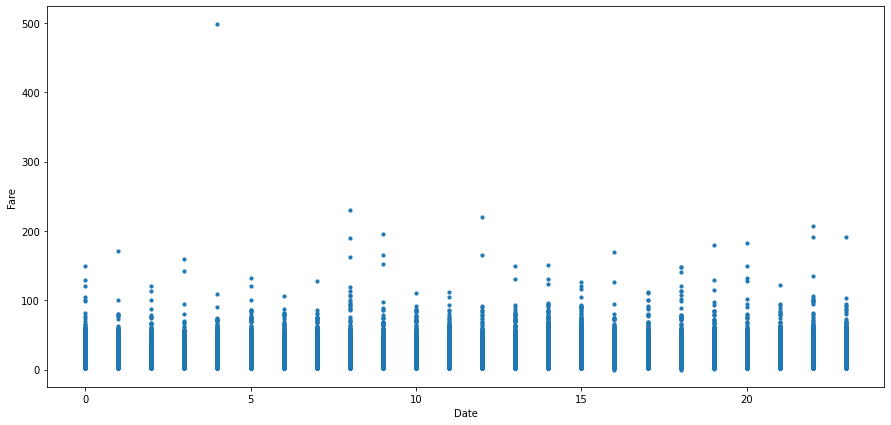

In [44]:
#Relationship between hour and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['Hour'], y = df['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

*From the above plot we can observe that the cabs taken at 12 am, 8 am and 8 pm are the costliest. Hence we can assume that cabs taken early in morning and late at night are costliest* 

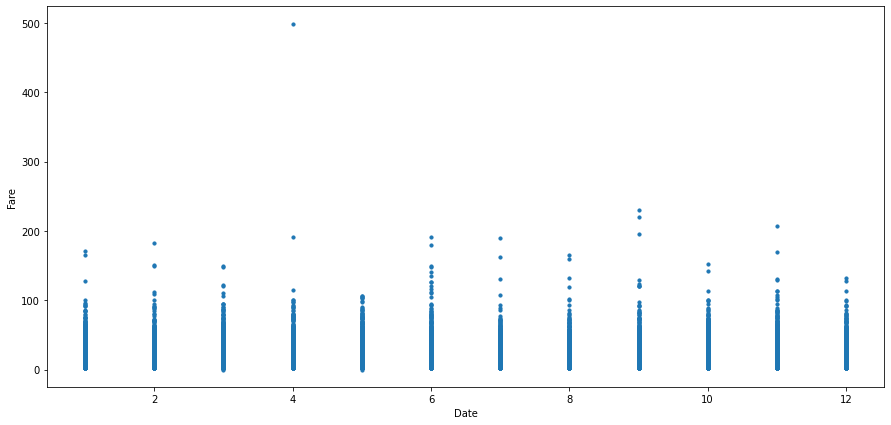

In [45]:
#Relationship between month and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['Month'], y = df['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

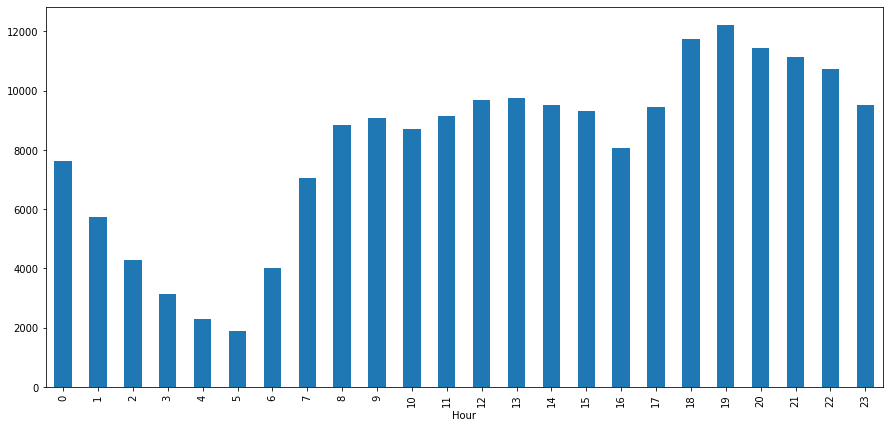

In [46]:
plt.figure(figsize=(15,7))
df.groupby(df["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

*Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours* 

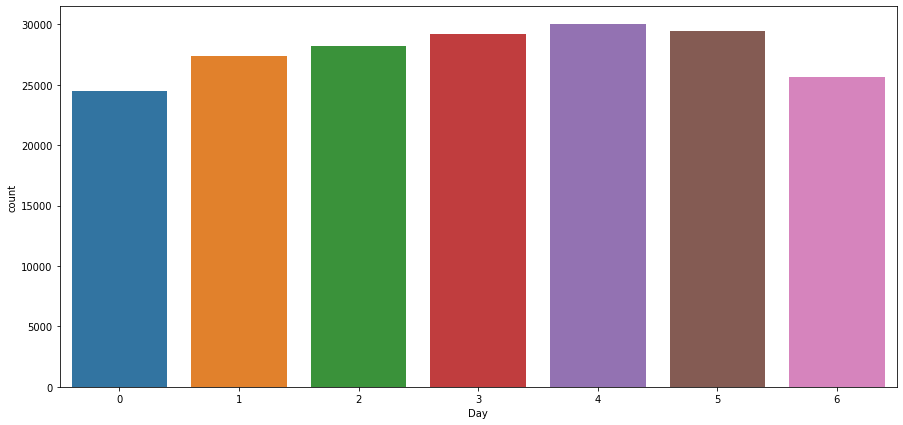

In [47]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=df)

*The day of the week does not seem to have much influence on the number of cabs rides*

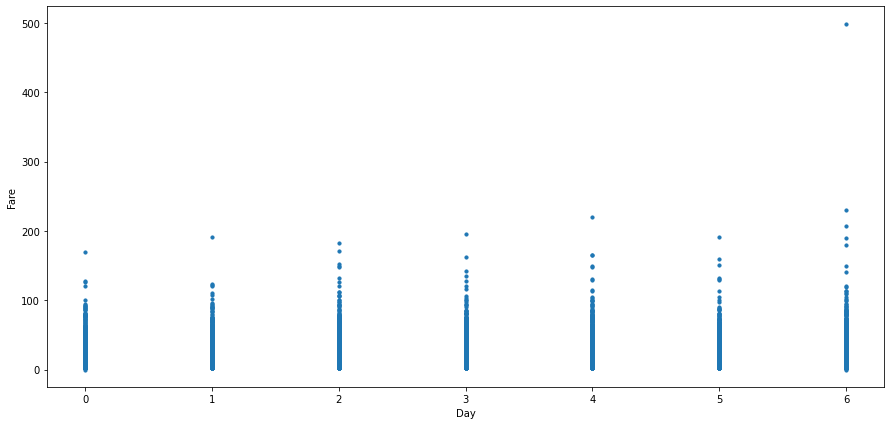

In [48]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x = df['Day'], y = df['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

No such conclusions can be made based on the day of the week.

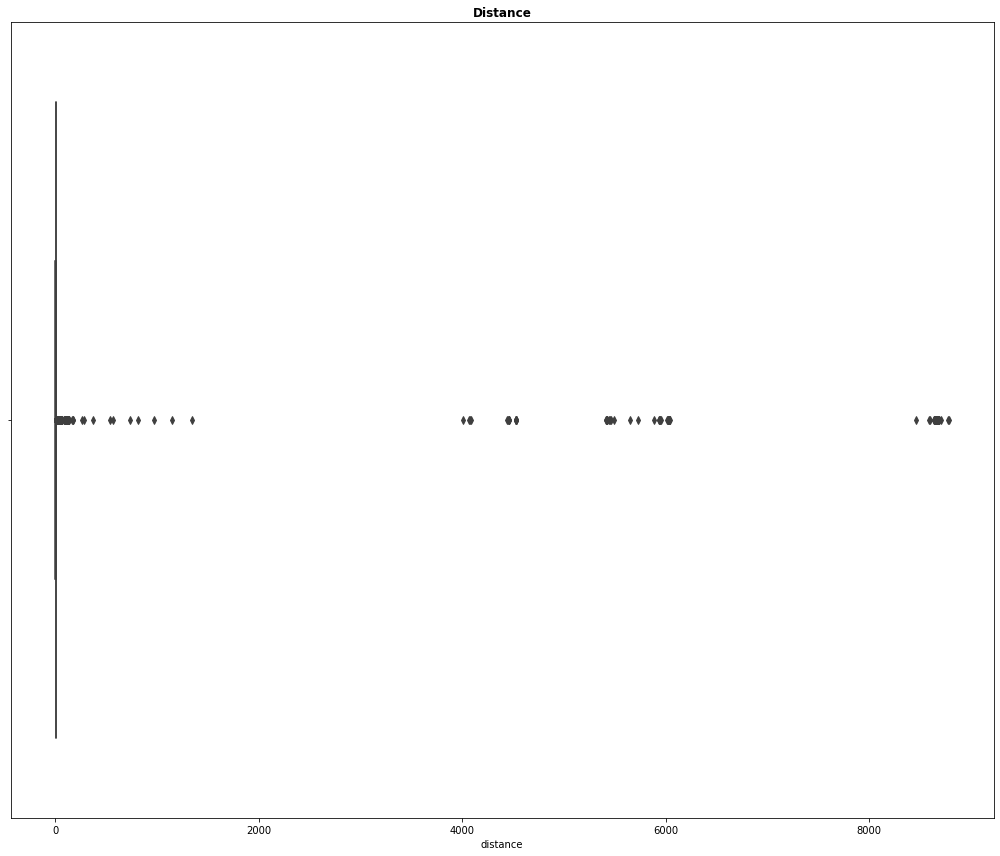

In [49]:
# Define a figure.
plt.figure(figsize=(14,12))

# Box plot distribution
sns.boxplot(df['distance'])
plt.title('Distance', weight='bold')
plt.tight_layout()

We can observe that for a few data points have a large distance value. This might be the case when someone plans to go on a long road trip via taxi.

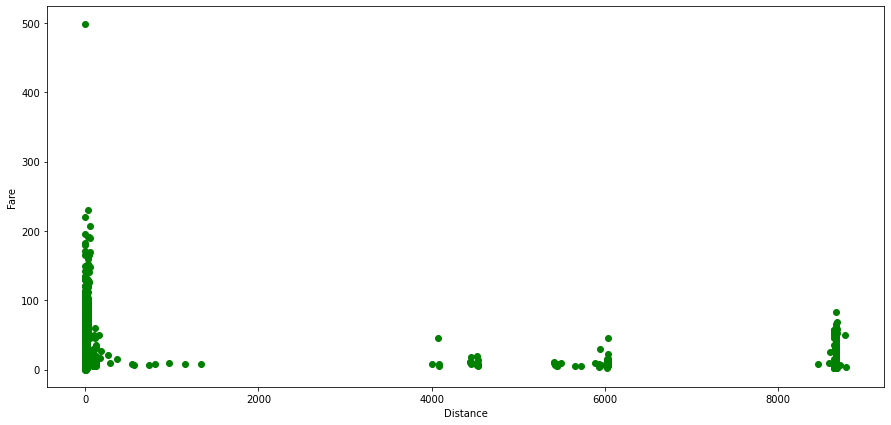

In [50]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = df['distance'],y = df['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

It is quite obvious that distance will effect the amount of fare

## **Feature Scaling**

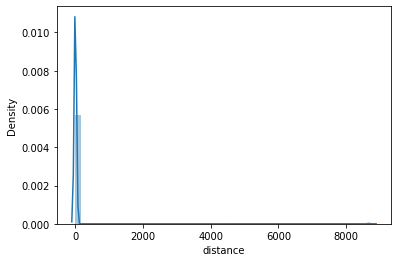

In [51]:
#Normality check if data is uniformly distributed or not-
sns.distplot(df['distance'])

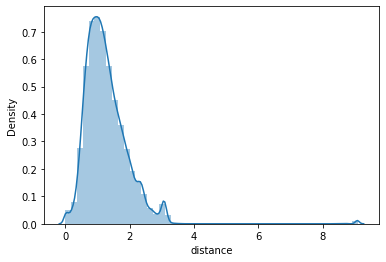

In [52]:
# Since skewness of distance variable is high, apply log transform to reduce the skewness-
df['distance'] = np.log1p(df['distance'])
sns.distplot(df['distance'])

## **Splitting the Dataframe into train and test sets**.
***
Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets.

Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parameters.

In [53]:
# Lets have a look at the data before going futther with splitting.
df

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,7.5,1,2015,5,7,3,19,0.987056
1,7.7,1,2009,7,17,4,20,1.240572
2,12.9,1,2009,8,24,0,21,1.797804
3,5.3,3,2009,6,26,4,8,0.978959
4,16.0,5,2014,8,28,3,17,1.700274
...,...,...,...,...,...,...,...,...
199995,3.0,1,2012,10,28,6,10,0.106349
199996,7.5,1,2014,3,14,4,1,1.056070
199997,30.9,2,2009,6,29,0,0,2.628308
199998,14.5,1,2015,5,20,2,14,1.512864


In [54]:
# independent variables
X = df[list(df.columns)[1:]]

# dependent variable
y = df["fare_amount"]

In [55]:
# display independent variables dataframe
X

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,5,7,3,19,0.987056
1,1,2009,7,17,4,20,1.240572
2,1,2009,8,24,0,21,1.797804
3,3,2009,6,26,4,8,0.978959
4,5,2014,8,28,3,17,1.700274
...,...,...,...,...,...,...,...
199995,1,2012,10,28,6,10,0.106349
199996,1,2014,3,14,4,1,1.056070
199997,2,2009,6,29,0,0,2.628308
199998,1,2015,5,20,2,14,1.512864


In [56]:
# display dependent variable dataframe
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 194333, dtype: float64

In [57]:
# calling train_test_split() to get the training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(145749, 7)
(48584, 7)


##**Models**
***
Now its time to implement the Machine Learning models and check the accuracy of each model to point out the best one out of all. In this project we are implementing 7 machine learning algorithms to predict the target variable and then we'll apply optimization techniques on the one that gives best resulting accuracy out of all.

Following algorithms have been used for predictions:-

* Linear Regression 
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree
* Random Forest Regression
* XGB Regression

### **Linear Regression**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. There are two main types:

**Simple regression**:

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

**y=mx+b**

**Multivariable regression**:

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

**f(x,y,z)=w1x+w2y+w3z**

In [58]:
# building the model and fitting training data
reg= LinearRegression().fit(X_train, y_train)

In [59]:
# checking the score
reg.score(X_train, y_train)

0.46804849449226626

In [60]:
# check the coefficeints
reg.coef_

array([ 6.30132857e-02,  5.35153086e-01,  7.99952751e-02,  8.61638071e-04,
       -4.52603772e-02, -5.04798675e-03,  9.30639308e+00])

In [61]:
# predict for train data
y_pred_train = reg.predict(X_train)

# predict for test data
y_pred_test = reg.predict(X_test)

In [62]:
# calculating MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)


# calculating r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr )

MSE : 49.92810131601441
RMSE : 7.065981978183529
MAE : 3.340393274644683
R2 : 0.46804849449226626
Adjusted R2 : 0.46797183810766163


In [63]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [64]:
# calculating MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

# calculating r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 56.636513075232266
RMSE : 7.5257234253746175
MAE : 3.3785816442535137
R2 : 0.4253689134336962
Adjusted R2 : 0.42528610674714384


In [65]:
# storing the test set metrics value in test evaluation dataframe.
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

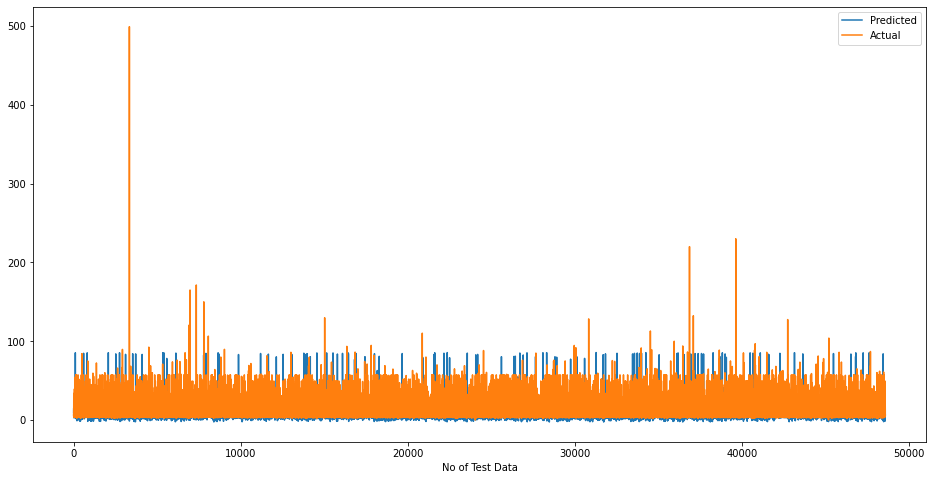

In [66]:
# Plot the figure
plt.figure(figsize=(16,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

### **Lasso Regression**

Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

**Limitation of Lasso Regression**:
Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

In [67]:
# Creating an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Model Score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.40534034285903353 0.4427716897813241


In [68]:
# Predict for training data
y_pred_train_lasso=lasso.predict(X_train)

# Predict for testing data
y_pred_test_lasso=lasso.predict(X_test)

In [69]:
# calculating MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

# calculating RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


# calculating MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


# calculating r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )


MSE : 52.3005410092689
RMSE : 7.2319112971101145
MAE : 3.615989325321636
R2 : 0.4427716897813241
Adjusted R2 : 0.442691390905922


In [70]:
# storing the train set metrics value in the train evaluation dataframe
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df = training_df.append(dict1,ignore_index=True)

In [71]:
# calculating MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

# calculating RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


# calculating MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


# calculating r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )

MSE : 58.6105594255757
RMSE : 7.655753354541648
MAE : 3.6466018760884156
R2 : 0.40534034285903353
Adjusted R2 : 0.40525464997365823


In [72]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

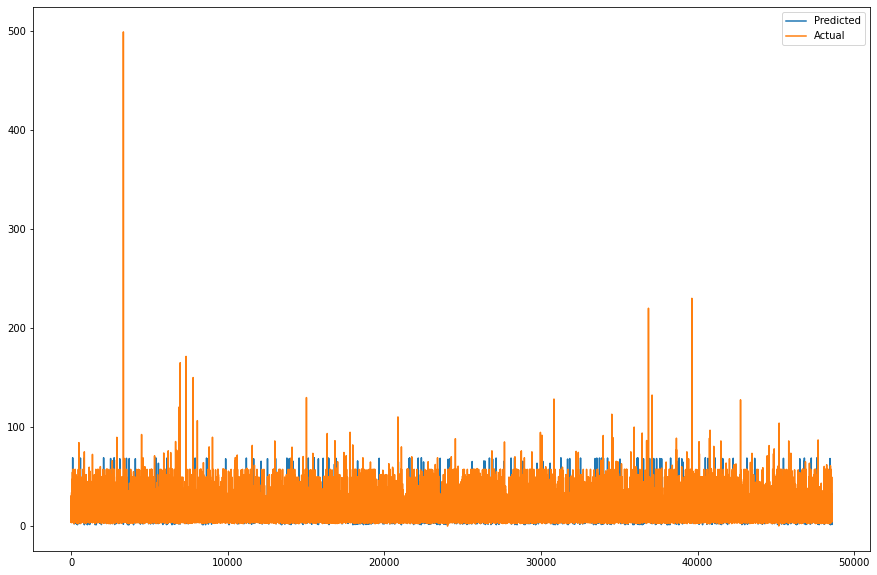

In [73]:
#Plot the actual vs predicted graph.
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **Ridge Regression**

In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient  lambda  to control that penalty term. In this case if  lambda  is zero then the equation is the basic OLS else if  lambda  >  0 then it will add a constraint to the coefficient. As we increase the value of lambda this constraint causes the value of the coefficient to tend towards zero. This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.

**Limitation of Ridge Regression**: Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

In [74]:
# Creating the model object
ridge= Ridge(alpha=0.1)

In [75]:
# FITTING THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [76]:
# checking the score
ridge.score(X_train, y_train)

0.4680484944913793

In [77]:
# predict for train data
y_pred_train_ridge=ridge.predict(X_train)

# predict for test data
y_pred_test_ridge=ridge.predict(X_test)

In [78]:
# calculating MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

# calculating RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


# calculating MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


# calculating r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_r)

MSE : 49.92810131609767
RMSE : 7.06598197818942
MAE : 3.3403938527364545
R2 : 0.4680484944913793
Adjusted R2 : 0.46797183810677456


In [79]:
# storing the train set metrics value in the train evaluation dataframe 
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [80]:
# calculating MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

# calculating RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


# calculating MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


# calculating r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_r)

MSE : 56.636510218481725
RMSE : 7.52572323557555
MAE : 3.3785822045729086
R2 : 0.42536894241813705
Adjusted R2 : 0.42528613573576146


In [81]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

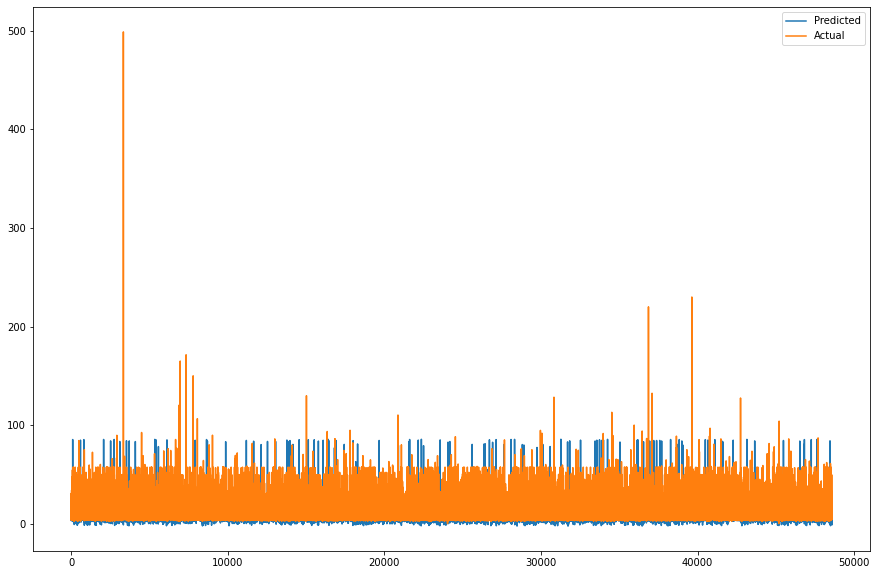

In [82]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **Elastic Net Regression**

Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.

In [83]:
# creating a model object.
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [84]:
# FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [85]:
# check the score
elasticnet.score(X_train, y_train)

0.46326049807320735

In [86]:
# predict on train data
y_pred_train_en=elasticnet.predict(X_train)

# predict on test data
y_pred_test_en=elasticnet.predict(X_test)

In [87]:
# calculating MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 50.377494856283306
RMSE : 7.097710536242183
MAE : 3.41731156135584
R2 : 0.46326049807320735
Adjusted R2 : 0.463183151718763


In [88]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [89]:
# calculating MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 56.87561524906582
RMSE : 7.541592355004732
MAE : 3.4527975236905917
R2 : 0.42294299533792934
Adjusted R2 : 0.42285983906667124


In [90]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

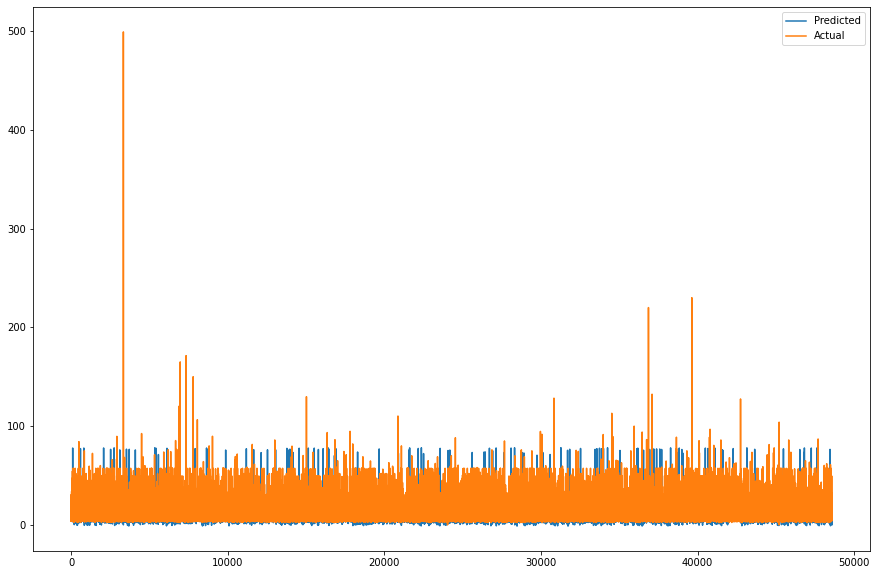

In [91]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [92]:
# display test evaluation dataframe
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,3.379,56.637,7.526,0.425,0.43
1,Lasso regression,3.647,58.611,7.656,0.405,0.41
2,Ridge regression,3.379,56.637,7.526,0.425,0.43
3,Elastic net regression Test,3.453,56.876,7.542,0.423,0.42


###**Decision Tree**

Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In a Decision Tree diagram, we have:

**Root Node**: The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.

**Splitting**: It is a process of dividing a node into two or more sub-nodes.

**Decision Node**: This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.

**Leaf**: Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.

In [95]:
# building the model
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=7, max_leaf_nodes=100)
# fitting training data to the model
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=7,
                      max_leaf_nodes=100)

In [96]:
# predict for train data
y_pred_train_d = decision_regressor.predict(X_train)

# predict for test data
y_pred_test_d = decision_regressor.predict(X_test)

In [97]:
# calculating model score
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# calculating r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


Model Score: 0.8166713384956934
MSE : 17.206929374097342
RMSE : 4.148123596772081
MAE : 2.1213774207315943
R2 : 0.8166713384956934
Adjusted R2 : 0.8166449200867975


In [98]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [99]:

# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


# calculating r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


MSE : 24.705506656026206
RMSE : 4.970463424674424
MAE : 2.187087101375564
R2 : 0.7493392272390496
Adjusted R2 : 0.7493031059979155


In [100]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [101]:
# display train evaluation dataframe.
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,3.340,49.928,7.066,0.468,0.47
1,Lasso regression,3.616,52.301,7.232,0.443,0.44
2,Ridge regression,3.340,49.928,7.066,0.468,0.47
3,Elastic net regression,3.417,50.377,7.098,0.463,0.46
4,Decision tree regression,2.121,17.207,4.148,0.817,0.82


In [102]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,3.379,56.637,7.526,0.425,0.43
1,Lasso regression,3.647,58.611,7.656,0.405,0.41
2,Ridge regression,3.379,56.637,7.526,0.425,0.43
3,Elastic net regression Test,3.453,56.876,7.542,0.423,0.42
4,Decision tree regression,2.187,24.706,4.970,0.749,0.75


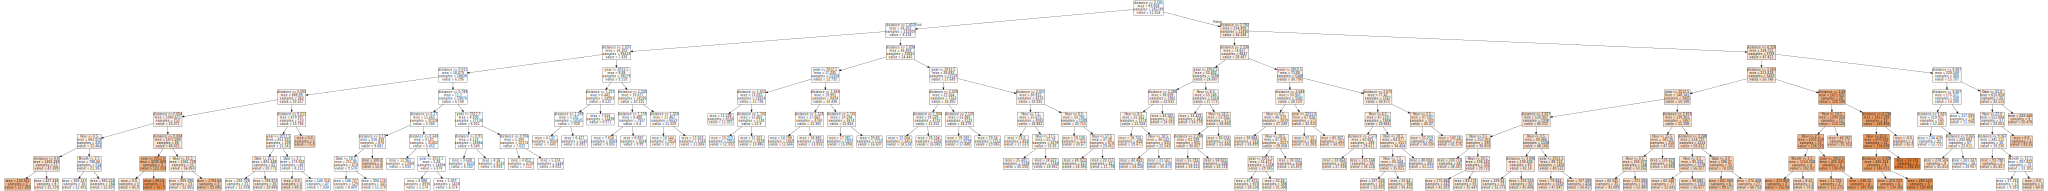

In [103]:

# DOT data
dot_data = tree.export_graphviz(decision_regressor, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names='views',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render

# Display graph
graph

### **Random Forest**

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [105]:
# Create an instance of the RandomForestRegressor.
rf_model = RandomForestRegressor(n_estimators = 10, max_depth = 10)

# fitting the train data in model.
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [106]:
# predict for train data.
y_pred_train_r = rf_model.predict(X_train)

# predict for test data.
y_pred_test_r = rf_model.predict(X_test)


In [107]:
# calculating model score.
print("Model Score:",rf_model.score(X_train,y_train))

# calculating MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


# calculating r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


Model Score: 0.8510624446449448
MSE : 13.979036202612246
RMSE : 3.7388549320095645
MAE : 1.9498900084810808
R2 : 0.8510624446449448
Adjusted R2 : 0.8510409821349093


In [108]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [109]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)

# Calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


MSE : 23.38389593548243
RMSE : 4.8356898096840775
MAE : 2.087106436840555
R2 : 0.7627482201859663
Adjusted R2 : 0.7627140312354825


In [110]:
# storing the test set metrics value in the test evaluation dataframe.
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [111]:
# feature importances for random forest model
rf_model.feature_importances_

array([0.00121078, 0.02829672, 0.00818697, 0.00893192, 0.00592277,
       0.01617419, 0.93127663])

In [112]:
# storing feature importances in a dataframe.
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [113]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [114]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
6,distance,0.93
1,year,0.03
5,Hour,0.02
2,Month,0.01
3,Date,0.01
4,Day,0.01
0,passenger_count,0.00


In [115]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,3.379,56.637,7.526,0.425,0.43
1,Lasso regression,3.647,58.611,7.656,0.405,0.41
2,Ridge regression,3.379,56.637,7.526,0.425,0.43
3,Elastic net regression Test,3.453,56.876,7.542,0.423,0.42
4,Decision tree regression,2.187,24.706,4.970,0.749,0.75
5,Random forest regression,2.087,23.384,4.836,0.763,0.76


###**XGB Regressor**

XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [116]:
# making a model object of XGB regressor.
model = XGBRegressor(n_estimators=11, max_depth=8)

# fitting train data in XGB model. 
model.fit(X_train, y_train)

[16:29:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, n_estimators=11)

In [117]:
# predict on train data.
y_pred_train_xgb = model.predict(X_train)

# predict on test data.
y_pred_test_xgb = model.predict(X_test)

In [118]:
# calculating model score on train data.
print("Model Score:", model.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :", MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :", RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :", MAE_d)

# calculating r2
r2_d= r2_score(y_train, y_pred_train_xgb)
print("R2 :", r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )


Model Score: 0.6187754365470772
MSE : 35.781116194160624
RMSE : 5.981731872473107
MAE : 3.5756489957927973
R2 : 0.6187754365470772
Adjusted R2 : 0.6187205005304399


In [119]:
# storing the train matrics in the train evaluation dataframe
dict1={'Model':'XGBoost Regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [120]:
# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_d)

# calculating r2
r2_d= r2_score((y_test), (y_pred_test_xgb))
print("R2 :",r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )

MSE : 42.69150799124986
RMSE : 6.533873888532733
MAE : 3.6234408241913774
R2 : 0.5668542024898424
Adjusted R2 : 0.5667917844113145


In [121]:
# storing the test matrics in the test evaluation dataframe
dict2={'Model':'XGBoost regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [122]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,3.379,56.637,7.526,0.425,0.43
1,Lasso regression,3.647,58.611,7.656,0.405,0.41
2,Ridge regression,3.379,56.637,7.526,0.425,0.43
3,Elastic net regression Test,3.453,56.876,7.542,0.423,0.42
4,Decision tree regression,2.187,24.706,4.970,0.749,0.75
5,Random forest regression,2.087,23.384,4.836,0.763,0.76
6,XGBoost regression,3.623,42.692,6.534,0.567,0.57


##**Optimization**
***

From the Scores we have seen earlier Random forest has given by far the accuracy in predicting the target variable. Hence we have selected that for the optimization section. 

Here we'll try to improve the accuracy of the random forest model in predicting the views of a TED talk. 

Now lets talk about Optimization technique we are using. But before diving into that we need to understand what hyperparameters are.

**Hyperparameters** are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, **max_depth** in Random Forest Algorithms.

Now we know what hyperparameters are, our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. To achieve that we'll use Grid Search CV that will help us find best hyperparameters values for our Random forest model.

**Grid Search** uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.


### **Random Forest with Grid Search CV**

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

In [124]:
# Defining a parameter dictionary for grid search CV. This will be the set of parameters 
# and their values the grid search algorithm will apply and get the 
# best combination of these parameters for optimised and accurate results.

param_grid_cv = {
'n_estimators': [200, 500],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [5,6,7,8,9,10,11],

}
param_grid_cv

{'n_estimators': [200, 500],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [5, 6, 7, 8, 9, 10, 11]}

In [ ]:
# Running the GridSearchCV algorithm on above parameter dictionary 
# with estimator as rf_model(random forest model) to get the 
# best combination of parameters for random forest algorithm.
CV_rfc = GridSearchCV(estimator = rf_model, param_grid = param_grid_cv, cv = 5)

# Fitting the training data into the model.
CV_rfc.fit(X_train, y_train)

In [ ]:
# predict on train data.
y_pred_train_grid_cvr = CV_rfc.predict(X_train)

# predict on test data.
y_pred_test_grid_cvr = CV_rfc.predict(X_test)

In [ ]:
# calculating model score on train data
print("Model Score:",CV_rfc.score(X_train,y_train))

# calculating MSE
MSE_rf = mean_squared_error(y_train, y_pred_train_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score(y_train, y_pred_train_grid_cvr)
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_grid_cvr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


In [ ]:
# Storing metrics in a dictionary.
dict1={'Model':'Random forest regression with gridSearchCV ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

# adding the values to the train evaluation dataframe.
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_grid_cvr))
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_grid_cvr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf)

In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Random forest regression with gridSearchCV',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# feature importances for grid CV random forest model.
rf_model.feature_importances_

In [ ]:
# storing feature importances in a dataframe
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)   